<h1><bold>CS374 - Computational and Numerical Methods Lab 4</bold></h1>

```
Vraj Gandhi        -  202201425
Kaushik Prajapati  -  202201472
```

<h2>Newton-Raphson Method:</h2>
<p> Basic library importing for ploting, styling and table creation.

In [63]:
import numpy as np
import math as mt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy

<p align='justify'> Implementing polynomial class with root finding algorithm. It has a function named 'find_roots' and 'plot' to find the root of the polynomial and plot the graph of the function. Internally it has implementation of root finding method that is secant method. Also the function prints the calculation table for better clarification.

In [64]:
class polynomial:

    def __init__(self, function, accuracy = 1e-9) -> None:
        self.function = function
        self.epsilon = accuracy

    def method_of_bisection(self, low, high, table=True):

        lval = self.function(low)
        hval = self.function(high)

        if lval * hval > 0:
            print(f"No root between {low} and {high}")
            return None

        data = []
        index = 1
        while (high-low) >= self.epsilon:

            mid = (low + high) / 2
            lval = self.function(low)
            mval = self.function(mid)
            hval = self.function(high)
            data_element = [index, low, high, mid, high-mid, mval]
            index += 1
            if lval * mval <= 0:
                high = mid
            elif mval * hval <= 0:
                low = mid
            else:
                return None
            data.append(data_element)
        self.df_b = pd.DataFrame(data, columns = ["Index", "An", "Bn", "C", "Bn-C", "F(C)"])
        if table:
            print("Calculation Table for Bisection Method:\n")
            display(self.df_b)
        return (low + high) / 2

    def newton_rapson_method(self, Xo, table=True):

        h = 1e-4
        Yo = self.function(Xo)
        Yo_prime = (self.function(Xo + h) - self.function(Xo))/h
        X1 = Xo - Yo/Yo_prime

        data = [[0, Xo, Yo, None, X1]]
        index = 1

        while abs(X1-Xo) >= self.epsilon:

            prev_X = Xo
            Xo = X1
            Yo = self.function(Xo)
            Yo_prime = (self.function(Xo + h) - self.function(Xo))/h
            X1 = Xo - Yo/Yo_prime

            data_elements = [index, Xo, Yo, Xo-prev_X, X1]
            data.append(data_elements)
            index += 1

        self.df_nr = pd.DataFrame(data, columns = ["Index", "Xn", "F(Xn)", "Xn - Xn-1", "Xn+1"])
        if table:
            print("Calculation Table for Newton-Rapshon Method:\n")
            display(self.df_nr)
        return X1

    def secant_method(self, X0, X1, table=True):

        data = []
        data.append([0, X0, self.function(X0), None])
        data.append([1, X1, self.function(X1), X1-X0])
        index = 2

        while abs(X1-X0) >= self.epsilon:

            Y0 = self.function(X0)
            Y1 = self.function(X1)
            X2 = X1 - self.function(X1) * ((X1 - X0) / (Y1 - Y0))

            data_element = [index, X2, self.function(X2), X2-X1]
            data.append(data_element)
            index += 1
            X0, X1 = X1, X2

        if table:
            print("Calculation Table for Secant Method:\n")
            self.df_s = pd.DataFrame(data, columns = ["Index", "Xn", "F(Xn)", "Xn-Xn-1"])
            display(self.df_s)

        return X1

    def find_roots(self, a=0, b=1, method = 'None', table=True):

        root = None
        match method:
            case 'bisection':
                root = self.method_of_bisection(low=a, high=b)
            case 'newton':
                root = self.newton_rapson_method(Xo=a)
            case 'secant':
                root = self.secant_method(X0=a, X1=b)
        if root is None:
            return None
        return np.round(root, 8)

    def plot(self, low=-10, high=10, xlimit = (-10, 10), ylimit = (-10, 10), figno=1):

        x = np.arange(low, high, 0.01)
        y = self.function(x)

        plt.figure(figno)
        plt.plot(x, y, label="y = f(x)")
        plt.xlabel("x-axis")
        plt.ylabel("y-axis")
        plt.xlim(xlimit)
        plt.ylim(ylimit)
        plt.title("Plot for the function y = f(x)")
        plt.grid()
        plt.show()

    def converence_plot(self, root, xlimit = (-10, 10), ylimit = (-10, 10), do_plot = [True, True, True]):

        print("\nConvergence plot of the root:")
        n = 0
        if do_plot[0]:
            n_b = len(np.array(self.df_b.index))
            n = n_b
            points_b = np.array(self.df_b["C"])
            iterations_b = np.array([i for i in range(n_b)])
            plt.plot(iterations_b, points_b, label='Bisection')

        if do_plot[1]:
            n_nr = len(np.array(self.df_nr.index))
            n = max(n, n_nr)
            points_nr = np.array(self.df_nr["Xn"])
            iterations_nr = np.array([i for i in range(n_nr)])
            plt.plot(iterations_nr, points_nr, label='Newton')

        if do_plot[2]:
            n_s = len(np.array(self.df_s.index))
            n = max(n, n_s)
            points_s = np.array(self.df_s["Xn"])
            iterations_s = np.array([i for i in range(n_s)])
            plt.plot(iterations_s, points_s, label='Secant')

        iterations = [i for i in range(n)]
        _root = [root for i in range(n)]
        plt.plot(iterations, _root, label='y = root')
        plt.xlabel('Iterations')
        plt.ylabel('Xn Points')
        plt.title('Xn v/s Iteration')
        plt.grid()
        plt.legend()
        plt.show()


<h3>Question-1</h3>
Write a code, applying the algorithm of the secant method to determine both the
real roots of $f(x)= x^{6} - x - 1 = 0 .$

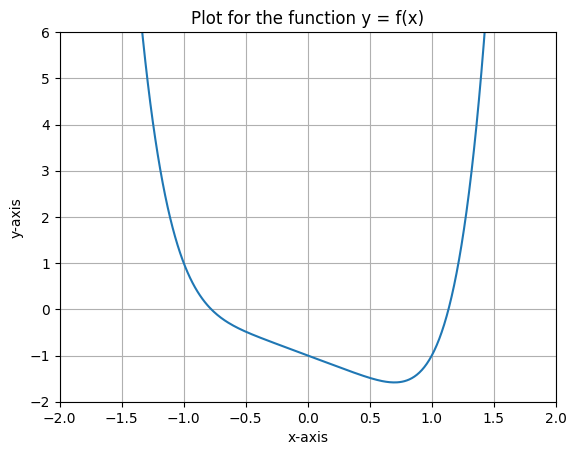

Calculation Table for Bisection Method:



Index        An        Bn         C      Bn-C      F(C)
0      1  1.000000  2.000000  1.500000  0.500000  8.890625
1      2  1.000000  1.500000  1.250000  0.250000  1.564697
2      3  1.000000  1.250000  1.125000  0.125000 -0.097713
3      4  1.125000  1.250000  1.187500  0.062500  0.616653
4      5  1.125000  1.187500  1.156250  0.031250  0.233269
5      6  1.125000  1.156250  1.140625  0.015625  0.061578
6      7  1.125000  1.140625  1.132812  0.007812 -0.019576
7      8  1.132812  1.140625  1.136719  0.003906  0.020619
8      9  1.132812  1.136719  1.134766  0.001953  0.000427
9     10  1.132812  1.134766  1.133789  0.000977 -0.009598

Calculation Table for Newton-Rapshon Method:



Index        Xn     F(Xn)  Xn - Xn-1      Xn+1
0      0  1.000000 -1.000000        NaN  1.199940
1      1  1.199940  0.785148   0.199940  1.143573
2      2  1.143573  0.093005  -0.056367  1.134911
3      3  1.134911  0.001928  -0.008662  1.134724

Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0      0  1.000000 -1.000000e+00       NaN
1      1  2.000000  6.100000e+01  1.000000
2      2  1.016129 -9.153677e-01 -0.983871
3      3  1.030675 -8.319214e-01  0.014546
4      4  1.175689  4.652272e-01  0.145014
5      5  1.123679 -1.106329e-01 -0.052010
6      6  1.133671 -1.080592e-02  0.009992
7      7  1.134753  2.936644e-04  0.001082
8      8  1.134724 -7.484507e-07 -0.000029


Convergence plot of the root:


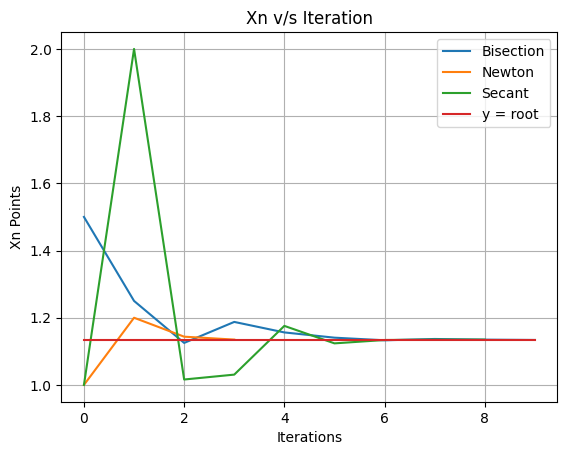

In [65]:
p = polynomial(function = lambda x: x**6 - x - 1, accuracy=0.001)
p.plot(xlimit=(-2, 2), ylimit=(-2, 6))
root1_b = p.find_roots(a=1, b=2, method='bisection')
root1_nr = p.find_roots(a=1, b=2, method='newton')
root1_s = p.find_roots(a=1, b=2, method='secant')
p.converence_plot(root=root1_s, xlimit=(-2, 2), ylimit=(-2, 6))
# print(f"\nFirst Root = {root1}")

Calculation Table for Bisection Method:



Index        An        Bn         C      Bn-C      F(C)
0       1 -2.000000  0.000000 -1.000000  1.000000  1.000000
1       2 -1.000000  0.000000 -0.500000  0.500000 -0.484375
2       3 -1.000000 -0.500000 -0.750000  0.250000 -0.072021
3       4 -1.000000 -0.750000 -0.875000  0.125000  0.323795
4       5 -0.875000 -0.750000 -0.812500  0.062500  0.100200
5       6 -0.812500 -0.750000 -0.781250  0.031250  0.008624
6       7 -0.781250 -0.750000 -0.765625  0.015625 -0.032958
7       8 -0.781250 -0.765625 -0.773438  0.007812 -0.012495
8       9 -0.781250 -0.773438 -0.777344  0.003906 -0.002019
9      10 -0.781250 -0.777344 -0.779297  0.001953  0.003281
10     11 -0.779297 -0.777344 -0.778320  0.000977  0.000626

Calculation Table for Newton-Rapshon Method:



Index        Xn     F(Xn)  Xn - Xn-1      Xn+1
0      0  0.000000 -1.000000        NaN -1.000000
1      1 -1.000000  1.000000  -1.000000 -0.857112
2      2 -0.857112  0.253597   0.142888 -0.789929
3      3 -0.789929  0.032884   0.067184 -0.778369
4      4 -0.778369  0.000759   0.011559 -0.778090

Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0       0  0.000000 -1.000000e+00       NaN
1       1  0.500000 -1.484375e+00  0.500000
2       2 -1.032258  1.242103e+00 -1.532258
3       3 -0.334206 -6.644001e-01  0.698052
4       4 -0.577472 -3.854448e-01 -0.243265
5       5 -0.913601  4.950894e-01 -0.336130
6       6 -0.724609 -1.306399e-01  0.188993
7       7 -0.764067 -3.696294e-02 -0.039458
8       8 -0.779636  4.206012e-03 -0.015569
9       9 -0.778045 -1.196611e-04  0.001591
10     10 -0.778089 -3.751291e-07 -0.000044


Convergence plot of the root:


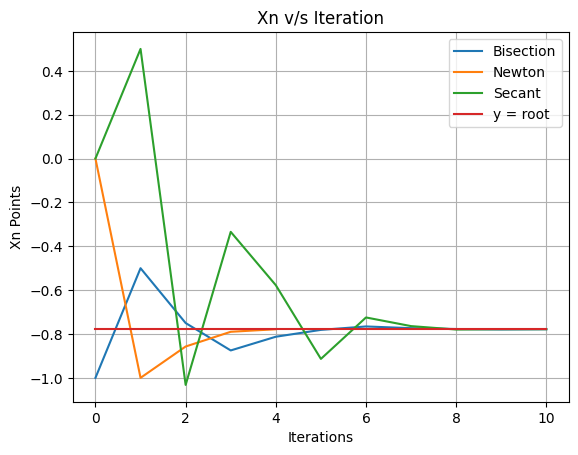


Second Root = -0.77808946


In [66]:
# root2 = p.find_roots(a=0, b=0.5, method='secant')
root2_b = p.find_roots(a=-2, b=0, method='bisection')
root2_nr = p.find_roots(a=0, b=0.5, method='newton')
root2_s = p.find_roots(a=0, b=0.5, method='secant')
p.converence_plot(root=root2_s, xlimit=(-2, 2), ylimit=(-2, 6))
print(f"\nSecond Root = {root2_s}")

<h3>Question - 2</h3>
Numerically implement the secant method to solve all the problems given in the theory exercises on bisection. (Note: Since by now, through the bisection and the Newton-Raphson exercises, you know the values of the roots in your given problems, experiment with initial guess values on both sides of the actual root and on the same side of it. Plot the convergence towards the root in both the cases to check whether the convergence is monotonic or not. Also compare the efficiency of the convergence with both the bisection and the Newton- Raphson methods).


(a) The real root of $x^{3}-x^{2}-x-1$

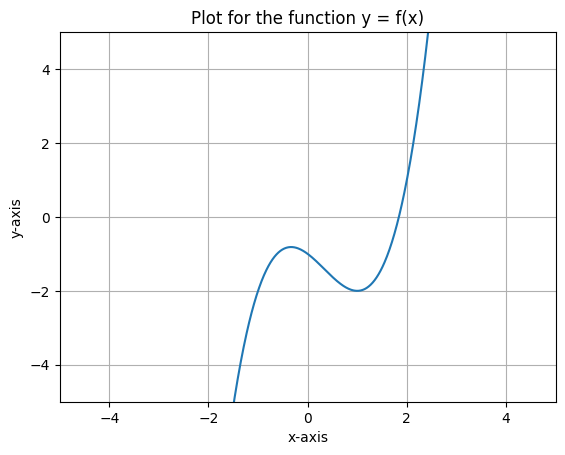


Initial guess of X0 and X1 on the left of the root:
Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0      0  1.000000 -2.000000e+00       NaN
1      1  1.500000 -1.375000e+00  0.500000
2      2  2.600000  7.216000e+00  1.100000
3      3  1.676056 -7.769026e-01 -0.923944
4      4  1.765863 -3.776947e-01  0.089806
5      5  1.850830  6.374702e-02  0.084967
6      6  1.838560 -3.973974e-03 -0.012270
7      7  1.839280 -3.766002e-05  0.000720
8      8  1.839287  2.261848e-08  0.000007


Convergence plot of the root:


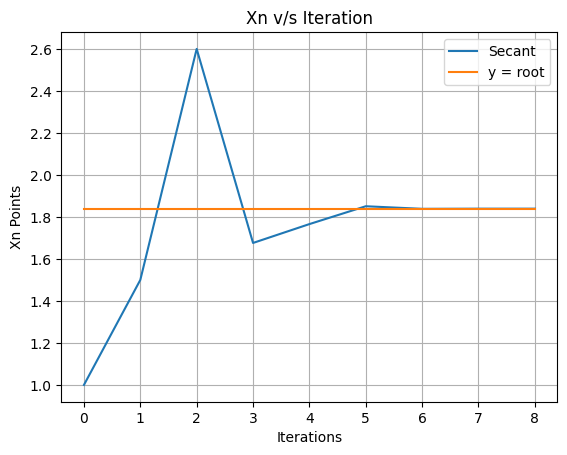


Root = 1.83928676


Initial guess of X0 and X1 on the different side of the root:
Calculation Table for Secant Method:



Index        Xn     F(Xn)   Xn-Xn-1
0      0  1.000000 -2.000000       NaN
1      1  2.000000  1.000000  1.000000
2      2  1.666667 -0.814815 -0.333333
3      3  1.816327 -0.123231  0.149660
4      4  1.842994  0.020342  0.026667
5      5  1.839216 -0.000389 -0.003778
6      6  1.839287 -0.000001  0.000071


Convergence plot of the root:


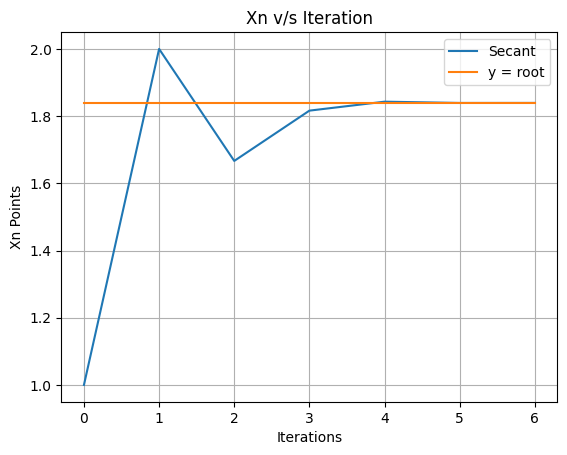


Root = 1.83928654

Initial guess of X0 and X1 on the right of the root:
Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0      0  2.000000  1.000000e+00       NaN
1      1  2.500000  5.875000e+00  0.500000
2      2  1.897436  3.335693e-01 -0.602564
3      3  1.861164  1.218504e-01 -0.036272
4      4  1.840289  5.486322e-03 -0.020875
5      5  1.839305  9.769402e-05 -0.000984
6      6  1.839287  8.080120e-08 -0.000018


Convergence plot of the root:


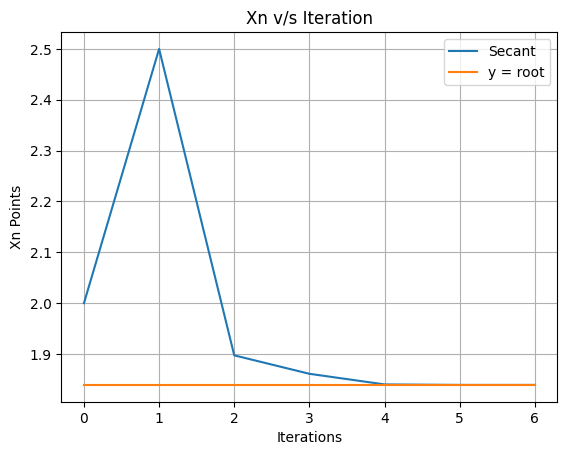


Root = 1.83928677


In [67]:
p = polynomial(function = lambda x: x**3 - x**2 - x - 1, accuracy=0.0001)
p.plot(xlimit=(-5, 5), ylimit=(-5, 5))
print("\nInitial guess of X0 and X1 on the left of the root:")
root = p.find_roots(a=1, b=1.5, method='secant')
p.converence_plot(root=root, xlimit=(-2, 2), ylimit=(-2, 6), do_plot = [False, False, True])
print(f"\nRoot = {root}\n")

print("\nInitial guess of X0 and X1 on the different side of the root:")
root = p.find_roots(a=1, b=2, method='secant')
p.converence_plot(root=root, xlimit=(-2, 2), ylimit=(-2, 6), do_plot = [False, False, True])
print(f"\nRoot = {root}")

print("\nInitial guess of X0 and X1 on the right of the root:")
root = p.find_roots(a=2, b=2.5, method='secant')
p.converence_plot(root=root, xlimit=(-2, 2), ylimit=(-2, 6), do_plot = [False, False, True])
print(f"\nRoot = {root}")

<h4> Comparison Plots:

Calculation Table for Bisection Method:



Index        An        Bn         C      Bn-C      F(C)
0       1  1.000000  2.000000  1.500000  0.500000 -1.375000
1       2  1.500000  2.000000  1.750000  0.250000 -0.453125
2       3  1.750000  2.000000  1.875000  0.125000  0.201172
3       4  1.750000  1.875000  1.812500  0.062500 -0.143311
4       5  1.812500  1.875000  1.843750  0.031250  0.024506
5       6  1.812500  1.843750  1.828125  0.015625 -0.060497
6       7  1.828125  1.843750  1.835938  0.007812 -0.018271
7       8  1.835938  1.843750  1.839844  0.003906  0.003048
8       9  1.835938  1.839844  1.837891  0.001953 -0.007629
9      10  1.837891  1.839844  1.838867  0.000977 -0.002294
10     11  1.838867  1.839844  1.839355  0.000488  0.000376
11     12  1.838867  1.839355  1.839111  0.000244 -0.000960
12     13  1.839111  1.839355  1.839233  0.000122 -0.000292
13     14  1.839233  1.839355  1.839294  0.000061  0.000042

Calculation Table for Newton-Rapshon Method:



Index        Xn      F(Xn)  Xn - Xn-1      Xn+1
0      0  1.250000  -1.859375        NaN  2.815427
1      1  2.815427  10.574789   1.565427  2.198813
2      2  2.198813   2.597184  -0.616614  1.913636
3      3  1.913636   0.432103  -0.285177  1.843481
4      4  1.843481   0.023022  -0.070156  1.839302
5      5  1.839302   0.000081  -0.004179  1.839287

Calculation Table for Secant Method:



Index        Xn     F(Xn)   Xn-Xn-1
0      0  1.000000 -2.000000       NaN
1      1  2.000000  1.000000  1.000000
2      2  1.666667 -0.814815 -0.333333
3      3  1.816327 -0.123231  0.149660
4      4  1.842994  0.020342  0.026667
5      5  1.839216 -0.000389 -0.003778
6      6  1.839287 -0.000001  0.000071


Convergence plot of the root:


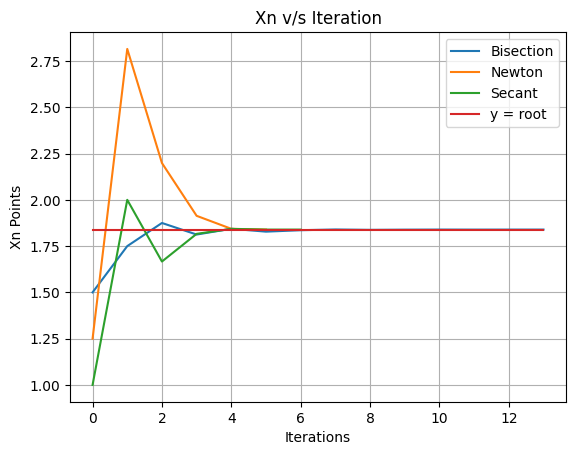


Second Root = 1.83928654


In [68]:
root1_b = p.find_roots(a=1, b=2, method='bisection')
root1_nr = p.find_roots(a=1.25, b=0.5, method='newton')
root1_s = p.find_roots(a=1, b=2, method='secant')
p.converence_plot(root=root1_s, xlimit=(-2, 2), ylimit=(-2, 6))
print(f"\nSecond Root = {root1_s}")

(b) The real root of $x = 1 + 0.3cos(x)$

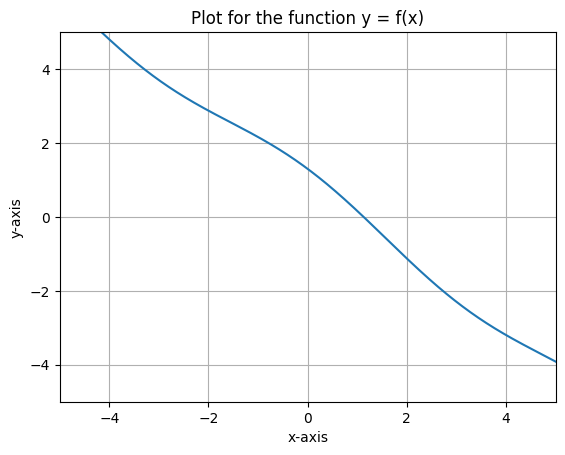


Initial guess of X0 and X1 on the left of the root:
Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0      0 -2.000000  2.875156e+00       NaN
1      1 -1.000000  2.162091e+00  1.000000
2      2  2.032108 -1.165645e+00  3.032108
3      3  0.970016  1.995698e-01 -1.062092
4      4  1.125275  4.003785e-03  0.155259
5      5  1.128453 -3.594015e-05  0.003179
6      6  1.128425  5.733056e-09 -0.000028


Convergence plot of the root:


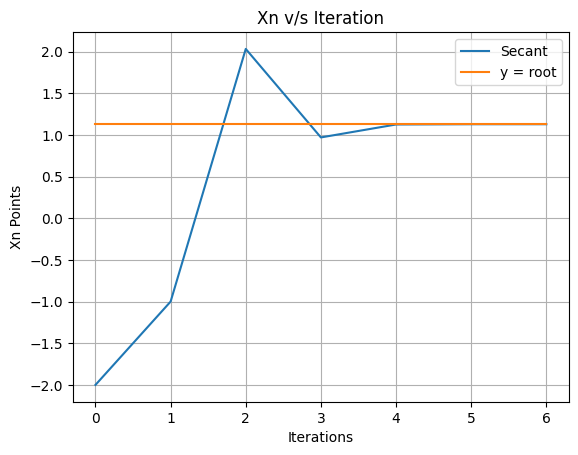


Root = 1.12842509


Initial guess of X0 and X1 on the different side of the root:
Calculation Table for Secant Method:



Index        Xn         F(Xn)       Xn-Xn-1
0      0 -1.000000  2.162091e+00           NaN
1      1  1.000000  1.620907e-01  2.000000e+00
2      2  1.162091 -4.286412e-02  1.620907e-01
3      3  1.128191  2.973707e-04 -3.389955e-02
4      4  1.128425  4.929768e-07  2.335585e-04
5      5  1.128425 -5.826895e-12  3.878328e-07


Convergence plot of the root:


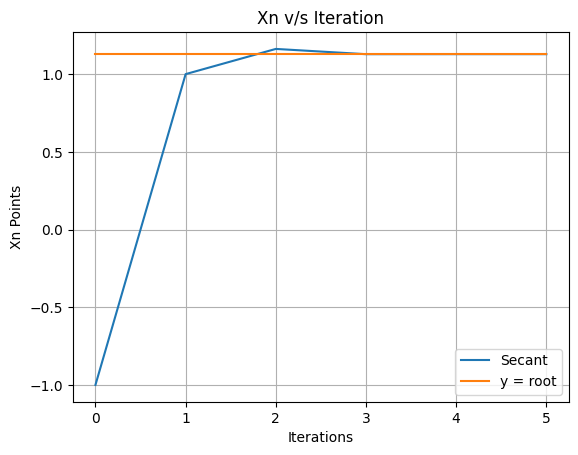


Root = 1.12842509

Initial guess of X0 and X1 on the right of the root:
Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0      0  1.000000  1.620907e-01       NaN
1      1  2.000000 -1.124844e+00  1.000000
2      2  1.125951  3.144505e-03 -0.874049
3      3  1.128388  4.768953e-05  0.002437
4      4  1.128425 -5.971701e-09  0.000038


Convergence plot of the root:


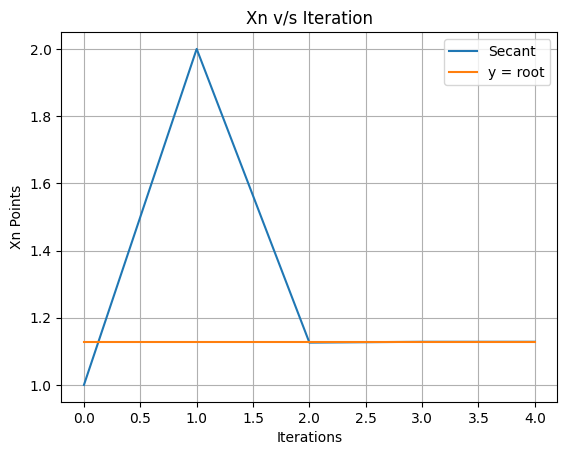


Root = 1.1284251


In [69]:
p = polynomial(function = lambda x: 1 + 0.3 * np.cos(x)-x, accuracy=0.0001)
p.plot(xlimit=(-5, 5), ylimit=(-5, 5))
print("\nInitial guess of X0 and X1 on the left of the root:")
root = p.find_roots(a=-2, b=-1, method='secant')
p.converence_plot(root=root, xlimit=(-5, 5), ylimit=(-5, 5), do_plot = [False, False, True])
print(f"\nRoot = {root}\n")

print("\nInitial guess of X0 and X1 on the different side of the root:")
root = p.find_roots(a=-1, b=1, method='secant')
p.converence_plot(root=root, xlimit=(-5, 5), ylimit=(-5, 5), do_plot = [False, False, True])
print(f"\nRoot = {root}")

print("\nInitial guess of X0 and X1 on the right of the root:")
root = p.find_roots(a=1, b=2, method='secant')
p.converence_plot(root=root, xlimit=(-5, 5), ylimit=(-5, 5), do_plot = [False, False, True])
print(f"\nRoot = {root}")

<h4> Comparison Plots:

Calculation Table for Bisection Method:



Index        An        Bn         C      Bn-C      F(C)
0       1 -2.000000  2.000000  0.000000  2.000000  1.300000
1       2  0.000000  2.000000  1.000000  1.000000  0.162091
2       3  1.000000  2.000000  1.500000  0.500000 -0.478779
3       4  1.000000  1.500000  1.250000  0.250000 -0.155403
4       5  1.000000  1.250000  1.125000  0.125000  0.004353
5       6  1.125000  1.250000  1.187500  0.062500 -0.075306
6       7  1.125000  1.187500  1.156250  0.031250 -0.035418
7       8  1.125000  1.156250  1.140625  0.015625 -0.015517
8       9  1.125000  1.140625  1.132812  0.007812 -0.005578
9      10  1.125000  1.132812  1.128906  0.003906 -0.000612
10     11  1.125000  1.128906  1.126953  0.001953  0.001871
11     12  1.126953  1.128906  1.127930  0.000977  0.000630
12     13  1.127930  1.128906  1.128418  0.000488  0.000009
13     14  1.128418  1.128906  1.128662  0.000244 -0.000301
14     15  1.128418  1.128662  1.128540  0.000122 -0.000146
15     16  1.128418  1.128540  1.128479  0.000061 -0.000069

Calculation Table for Newton-Rapshon Method:



Index        Xn     F(Xn)  Xn - Xn-1      Xn+1
0      0 -2.000000  2.875156        NaN  1.953710
1      1  1.953710 -1.065798   3.953710  1.119928
2      2  1.119928  0.010796  -0.833782  1.128429
3      3  1.128429 -0.000005   0.008501  1.128425

Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0      0 -0.500000  1.763275e+00       NaN
1      1  0.500000  7.632748e-01  1.000000
2      2  1.263275 -1.724655e-01  0.763275
3      3  1.122596  7.407033e-03 -0.140679
4      4  1.128389  4.555257e-05  0.005793
5      5  1.128425 -1.347251e-08  0.000036


Convergence plot of the root:


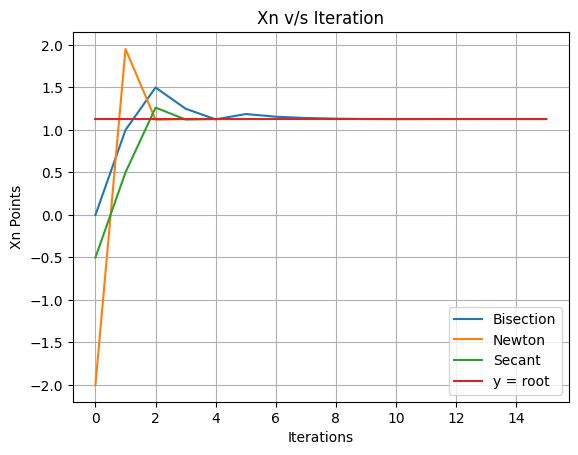


Second Root = 1.1284251


In [70]:
root1_b = p.find_roots(a=-2, b=2, method='bisection')
root1_nr = p.find_roots(a=-2, b=0.5, method='newton')
root1_s = p.find_roots(a=-0.5, b=0.5, method='secant')
p.converence_plot(root=root1_s, xlimit=(-5, 5), ylimit=(-5, 5))
print(f"\nSecond Root = {root1_s}")

(c) The smallest positive root of $cos(x) = \frac{1}{2} + sin(x)$

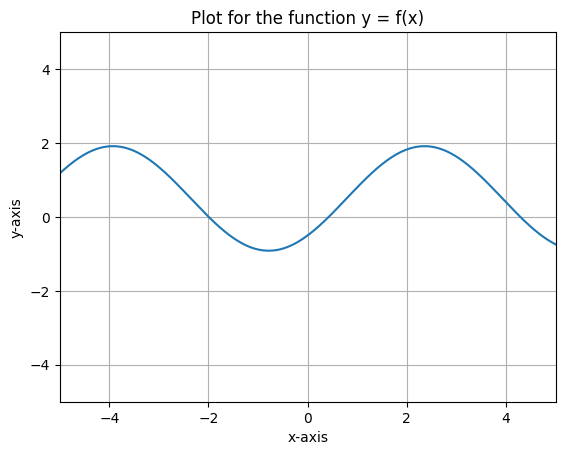


Initial guess of X0 and X1 on the left of the root:
Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0      0 -1.000000 -8.817733e-01       NaN
1      1  0.000000 -5.000000e-01  1.000000
2      2  1.309678  1.207940e+00  1.309678
3      3  0.383408 -5.331130e-02 -0.926269
4      4  0.422561 -1.944706e-03  0.039152
5      5  0.424043  1.561442e-05  0.001482
6      6  0.424031 -4.345902e-09 -0.000012


Convergence plot of the root:


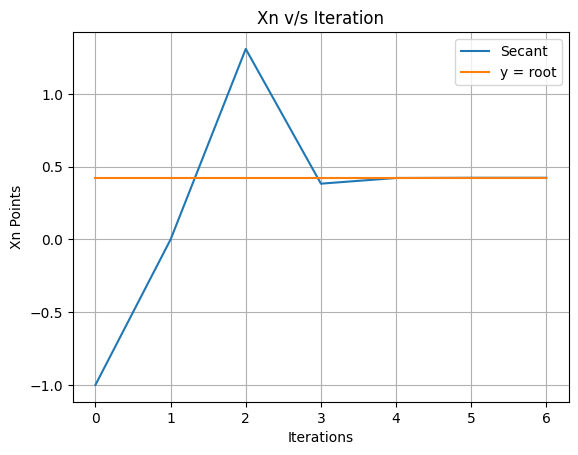


Root = 0.42403104


Initial guess of X0 and X1 on the different side of the root:
Calculation Table for Secant Method:



Index        Xn         F(Xn)       Xn-Xn-1
0      0  0.000000 -5.000000e-01           NaN
1      1  0.500000  1.018430e-01  5.000000e-01
2      2  0.415391 -1.141123e-02 -8.460926e-02
3      3  0.423916 -1.524760e-04  8.525035e-03
4      4  0.424031  2.513177e-07  1.154535e-04
5      5  0.424031 -5.475176e-12 -1.899825e-07


Convergence plot of the root:


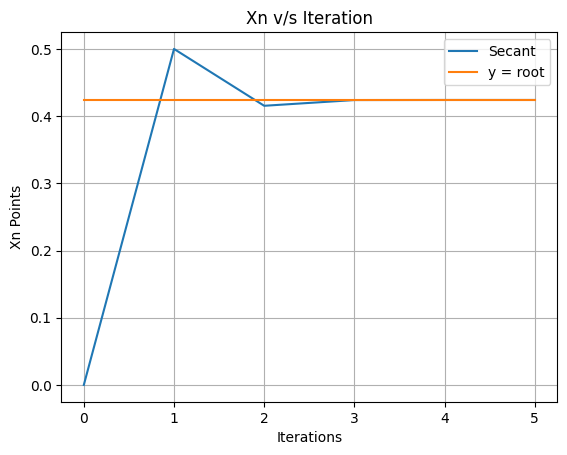


Root = 0.42403104

Initial guess of X0 and X1 on the right of the root:
Calculation Table for Secant Method:



Index        Xn         F(Xn)       Xn-Xn-1
0      0  0.500000  1.018430e-01           NaN
1      1  1.000000  8.011687e-01  5.000000e-01
2      2  0.427185  4.174612e-03 -5.728151e-01
3      3  0.424185  2.030154e-04 -3.000375e-03
4      4  0.424031  1.205693e-07 -1.533696e-04
5      5  0.424031  3.495981e-12 -9.113920e-08


Convergence plot of the root:


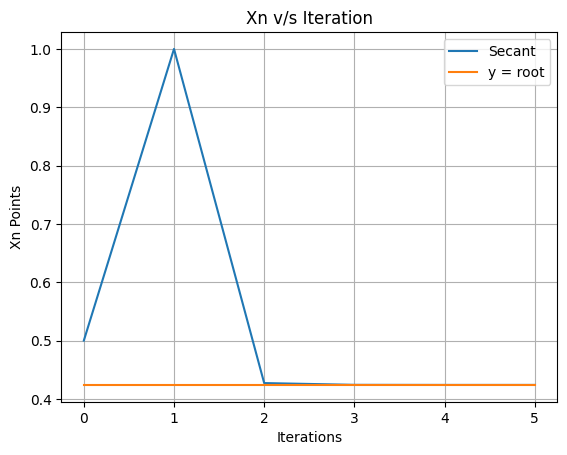


Root = 0.42403104


In [71]:
p = polynomial(function = lambda x: 0.5 + np.sin(x) - np.cos(x), accuracy=0.0001)
p.plot(xlimit=(-5, 5), ylimit=(-5, 5))
print("\nInitial guess of X0 and X1 on the left of the root:")
root = p.find_roots(a=-1, b=0, method='secant')
p.converence_plot(root=root, xlimit=(-5, 5), ylimit=(-5, 5), do_plot = [False, False, True])
print(f"\nRoot = {root}\n")

print("\nInitial guess of X0 and X1 on the different side of the root:")
root = p.find_roots(a=0, b=0.5, method='secant')
p.converence_plot(root=root, xlimit=(-5, 5), ylimit=(-5, 5), do_plot = [False, False, True])
print(f"\nRoot = {root}")

print("\nInitial guess of X0 and X1 on the right of the root:")
root = p.find_roots(a=0.5, b=1, method='secant')
p.converence_plot(root=root, xlimit=(-5, 5), ylimit=(-5, 5), do_plot = [False, False, True])
print(f"\nRoot = {root}")

<h4> Comparison Plots:

Calculation Table for Bisection Method:



Index        An        Bn         C      Bn-C      F(C)
0       1  0.000000  1.000000  0.500000  0.500000  0.101843
1       2  0.000000  0.500000  0.250000  0.250000 -0.221508
2       3  0.250000  0.500000  0.375000  0.125000 -0.064235
3       4  0.375000  0.500000  0.437500  0.062500  0.017863
4       5  0.375000  0.437500  0.406250  0.031250 -0.023442
5       6  0.406250  0.437500  0.421875  0.015625 -0.002851
6       7  0.421875  0.437500  0.429688  0.007812  0.007491
7       8  0.421875  0.429688  0.425781  0.003906  0.002316
8       9  0.421875  0.425781  0.423828  0.001953 -0.000268
9      10  0.423828  0.425781  0.424805  0.000977  0.001024
10     11  0.423828  0.424805  0.424316  0.000488  0.000378
11     12  0.423828  0.424316  0.424072  0.000244  0.000055
12     13  0.423828  0.424072  0.423950  0.000122 -0.000107
13     14  0.423950  0.424072  0.424011  0.000061 -0.000026

Calculation Table for Newton-Rapshon Method:



Index        Xn         F(Xn)  Xn - Xn-1      Xn+1
0      0  0.000000 -5.000000e-01        NaN  0.499975
1      1  0.499975  1.018091e-01   0.499975  0.424951
2      2  0.424951  1.217079e-03  -0.075024  0.424031
3      3  0.424031  2.340478e-07  -0.000920  0.424031

Calculation Table for Secant Method:



Index        Xn         F(Xn)       Xn-Xn-1
0      0  0.000000 -5.000000e-01           NaN
1      1  0.500000  1.018430e-01  5.000000e-01
2      2  0.415391 -1.141123e-02 -8.460926e-02
3      3  0.423916 -1.524760e-04  8.525035e-03
4      4  0.424031  2.513177e-07  1.154535e-04
5      5  0.424031 -5.475176e-12 -1.899825e-07


Convergence plot of the root:


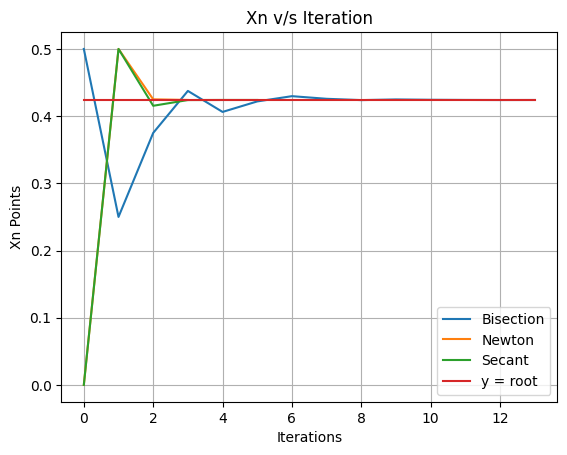


Second Root = 0.42403104


In [72]:
root1_b = p.find_roots(a=0, b=1, method='bisection')
root1_nr = p.find_roots(a=0, b=0.5, method='newton')
root1_s = p.find_roots(a=0, b=0.5, method='secant')
p.converence_plot(root=root1_s, xlimit=(-5, 5), ylimit=(-5, 5))
print(f"\nSecond Root = {root1_s}")

(d) The root of $x = e^{-x}$.

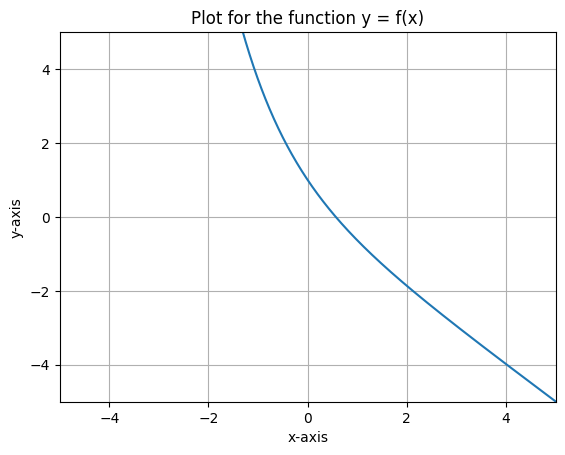


Initial guess of X0 and X1 on the left of the root:
Calculation Table for Secant Method:



Index        Xn         F(Xn)       Xn-Xn-1
0      0 -0.500000  2.148721e+00           NaN
1      1  0.000000  1.000000e+00  5.000000e-01
2      2  0.435267  2.118255e-01  4.352666e-01
3      3  0.552247  2.340863e-02  1.169799e-01
4      4  0.566780  5.694943e-04  1.453341e-02
5      5  0.567142  1.538564e-06  3.623908e-04
6      6  0.567143  1.011686e-10  9.816990e-07


Convergence plot of the root:


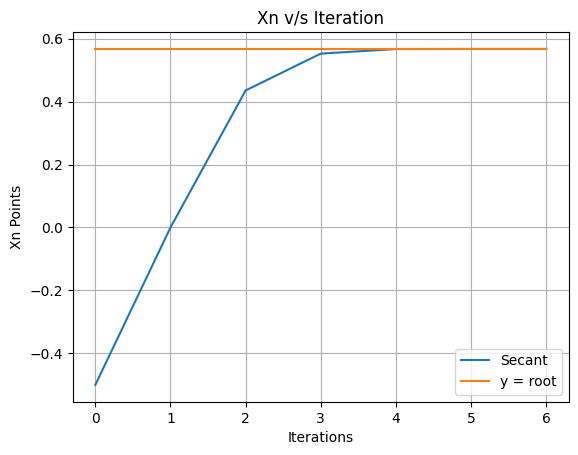


Root = 0.56714329


Initial guess of X0 and X1 on the different side of the root:
Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0      0  0.000000  1.000000e+00       NaN
1      1  1.000000 -6.321206e-01  1.000000
2      2  0.612700 -7.081395e-02 -0.387300
3      3  0.563838  5.182355e-03 -0.048861
4      4  0.567170 -4.241924e-05  0.003332
5      5  0.567143 -2.538017e-08 -0.000027


Convergence plot of the root:


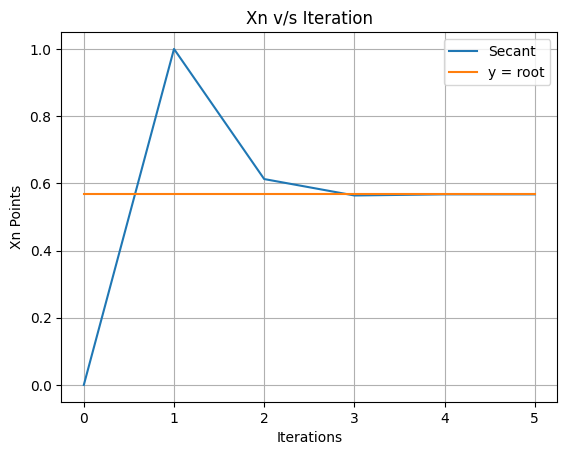


Root = 0.56714331

Initial guess of X0 and X1 on the right of the root:
Calculation Table for Secant Method:



Index        Xn         F(Xn)       Xn-Xn-1
0      0  1.000000 -6.321206e-01           NaN
1      1  2.000000 -1.864665e+00  1.000000e+00
2      2  0.487142  1.272383e-01 -1.512858e+00
3      3  0.583780 -2.599356e-02  9.663803e-02
4      4  0.567386 -3.810477e-04 -1.639324e-02
5      5  0.567143  1.144176e-06 -2.438888e-04
6      6  0.567143 -5.034095e-11  7.301348e-07


Convergence plot of the root:


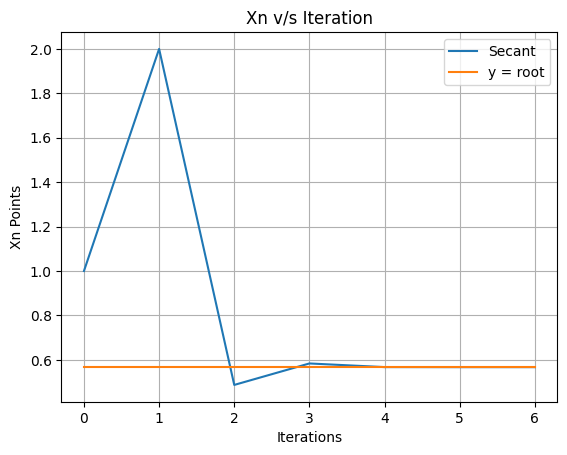


Root = 0.56714329


In [73]:
p = polynomial(function = lambda x: np.exp(-x) - x, accuracy=0.0001)
p.plot(xlimit=(-5, 5), ylimit=(-5, 5))
print("\nInitial guess of X0 and X1 on the left of the root:")
root = p.find_roots(a=-0.5, b=0, method='secant')
p.converence_plot(root=root, xlimit=(-5, 5), ylimit=(-5, 5), do_plot = [False, False, True])
print(f"\nRoot = {root}\n")

print("\nInitial guess of X0 and X1 on the different side of the root:")
root = p.find_roots(a=0, b=1, method='secant')
p.converence_plot(root=root, xlimit=(-5, 5), ylimit=(-5, 5), do_plot = [False, False, True])
print(f"\nRoot = {root}")

print("\nInitial guess of X0 and X1 on the right of the root:")
root = p.find_roots(a=1, b=2, method='secant')
p.converence_plot(root=root, xlimit=(-5, 5), ylimit=(-5, 5), do_plot = [False, False, True])
print(f"\nRoot = {root}")

<h4> Comparison Plots:

Calculation Table for Bisection Method:



Index        An        Bn         C      Bn-C      F(C)
0       1  0.000000  2.000000  1.000000  1.000000 -0.632121
1       2  0.000000  1.000000  0.500000  0.500000  0.106531
2       3  0.500000  1.000000  0.750000  0.250000 -0.277633
3       4  0.500000  0.750000  0.625000  0.125000 -0.089739
4       5  0.500000  0.625000  0.562500  0.062500  0.007283
5       6  0.562500  0.625000  0.593750  0.031250 -0.041498
6       7  0.562500  0.593750  0.578125  0.015625 -0.017176
7       8  0.562500  0.578125  0.570312  0.007812 -0.004964
8       9  0.562500  0.570312  0.566406  0.003906  0.001155
9      10  0.566406  0.570312  0.568359  0.001953 -0.001905
10     11  0.566406  0.568359  0.567383  0.000977 -0.000375
11     12  0.566406  0.567383  0.566895  0.000488  0.000390
12     13  0.566895  0.567383  0.567139  0.000244  0.000007
13     14  0.567139  0.567383  0.567261  0.000122 -0.000184
14     15  0.567139  0.567261  0.567200  0.000061 -0.000088

Calculation Table for Newton-Rapshon Method:



Index        Xn         F(Xn)  Xn - Xn-1      Xn+1
0      0 -2.000000  9.389056e+00        NaN -0.880748
1      1 -0.880748  3.293451e+00   1.119252  0.084343
2      2  0.084343  8.347735e-01   0.965090  0.519331
3      3  0.519331  7.558707e-02   0.434989  0.566725
4      4  0.566725  6.562903e-04   0.047393  0.567143
5      5  0.567143  3.785434e-08   0.000419  0.567143

Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0      0  0.000000  1.000000e+00       NaN
1      1  1.000000 -6.321206e-01  1.000000
2      2  0.612700 -7.081395e-02 -0.387300
3      3  0.563838  5.182355e-03 -0.048861
4      4  0.567170 -4.241924e-05  0.003332
5      5  0.567143 -2.538017e-08 -0.000027


Convergence plot of the root:


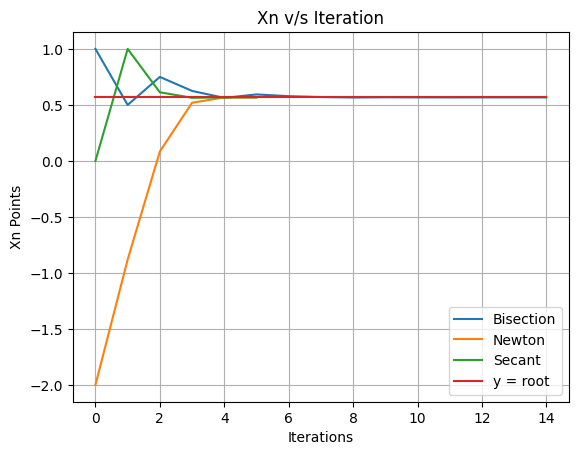


Second Root = 0.56714331


In [74]:
root1_b = p.find_roots(a=0, b=2, method='bisection')
root1_nr = p.find_roots(a=-2, b=0.5, method='newton')
root1_s = p.find_roots(a=0, b=1, method='secant')
p.converence_plot(root=root1_s, xlimit=(-5, 5), ylimit=(-5, 5))
print(f"\nSecond Root = {root1_s}")

(e) The smallest positive root of $e^{-x} = sin(x)$.

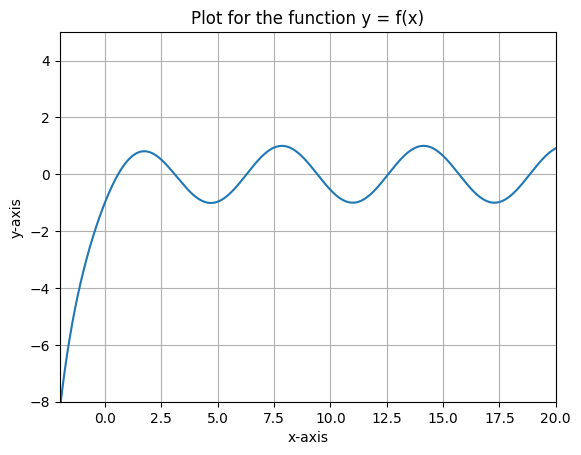


Initial guess of X0 and X1 on the left of the root:
Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0      0 -1.000000 -3.559753e+00       NaN
1      1  0.000000 -1.000000e+00  1.000000
2      2  0.390663 -2.958070e-01  0.390663
3      3  0.554767 -4.746138e-02  0.164104
4      4  0.586128 -3.337659e-03  0.031362
5      5  0.588501 -4.429344e-05  0.002372
6      6  0.588533 -4.257572e-08  0.000032


Convergence plot of the root:


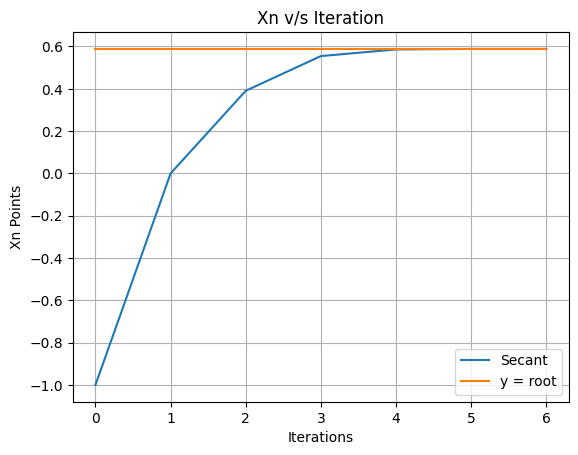


Root = 0.58853271


Initial guess of X0 and X1 on the different side of the root:
Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0      0  0.000000 -1.000000e+00       NaN
1      1  1.000000  4.735915e-01  1.000000
2      2  0.678614  1.203952e-01 -0.321386
3      3  0.569062 -2.721369e-02 -0.109552
4      4  0.589260  1.007800e-03  0.020197
5      5  0.588538  7.786074e-06 -0.000721
6      6  0.588533 -2.266152e-09 -0.000006


Convergence plot of the root:


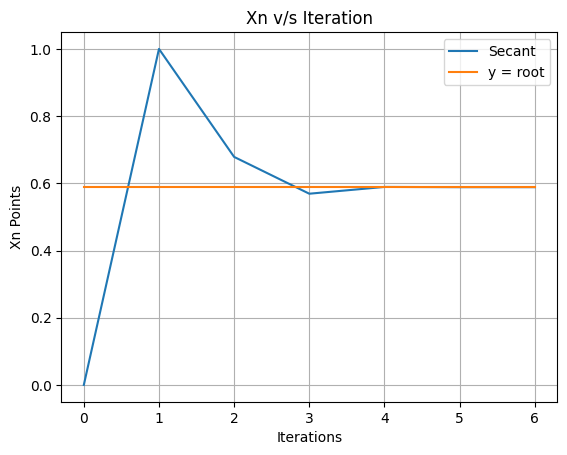


Root = 0.58853274

Initial guess of X0 and X1 on the right of the root:
Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0      0  1.000000  4.735915e-01       NaN
1      1  1.500000  7.743648e-01  0.500000
2      2  0.212710 -5.972808e-01 -1.287290
3      3  0.773258  2.369638e-01  0.560548
4      4  0.614037  3.500970e-02 -0.159221
5      5  0.586435 -2.911733e-03 -0.027602
6      6  0.588554  3.003950e-05  0.002119
7      7  0.588533  2.519781e-08 -0.000022


Convergence plot of the root:


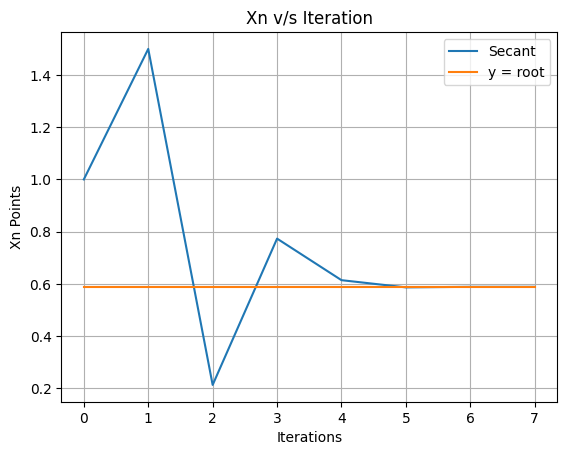


Root = 0.58853276


In [75]:
p = polynomial(function = lambda x: np.sin(x) - np.exp(-x), accuracy=0.0001)
p.plot(high=20, xlimit=(-2, 20), ylimit=(-8, 5))
print("\nInitial guess of X0 and X1 on the left of the root:")
root = p.find_roots(a=-1, b=0, method='secant')
p.converence_plot(root=root, xlimit=(-2, 20), ylimit=(-8, 5), do_plot = [False, False, True])
print(f"\nRoot = {root}\n")

print("\nInitial guess of X0 and X1 on the different side of the root:")
root = p.find_roots(a=0, b=1, method='secant')
p.converence_plot(root=root, xlimit=(-2, 20), ylimit=(-8, 5), do_plot = [False, False, True])
print(f"\nRoot = {root}")

print("\nInitial guess of X0 and X1 on the right of the root:")
root = p.find_roots(a=1, b=1.5, method='secant')
p.converence_plot(root=root, xlimit=(-2, 20), ylimit=(-8, 5), do_plot = [False, False, True])
print(f"\nRoot = {root}")

<h4> Comparison Plots:

Calculation Table for Bisection Method:



Index        An        Bn         C      Bn-C      F(C)
0       1  0.000000  1.000000  0.500000  0.500000 -0.127105
1       2  0.500000  1.000000  0.750000  0.250000  0.209272
2       3  0.500000  0.750000  0.625000  0.125000  0.049836
3       4  0.500000  0.625000  0.562500  0.062500 -0.036480
4       5  0.562500  0.625000  0.593750  0.031250  0.007221
5       6  0.562500  0.593750  0.578125  0.015625 -0.014495
6       7  0.578125  0.593750  0.585938  0.007812 -0.003603
7       8  0.585938  0.593750  0.589844  0.003906  0.001817
8       9  0.585938  0.589844  0.587891  0.001953 -0.000891
9      10  0.587891  0.589844  0.588867  0.000977  0.000464
10     11  0.587891  0.588867  0.588379  0.000488 -0.000213
11     12  0.588379  0.588867  0.588623  0.000244  0.000125
12     13  0.588379  0.588623  0.588501  0.000122 -0.000044
13     14  0.588501  0.588623  0.588562  0.000061  0.000041

Calculation Table for Newton-Rapshon Method:



Index        Xn         F(Xn)  Xn - Xn-1      Xn+1
0      0  1.200000  6.308449e-01        NaN  0.249203
1      1  0.249203 -5.327908e-01  -0.950797  0.553919
2      2  0.553919 -4.866876e-02   0.304717  0.588070
3      3  0.588070 -6.418293e-04   0.034151  0.588533
4      4  0.588533 -9.312508e-08   0.000463  0.588533

Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0      0  0.000000 -1.000000e+00       NaN
1      1  1.000000  4.735915e-01  1.000000
2      2  0.678614  1.203952e-01 -0.321386
3      3  0.569062 -2.721369e-02 -0.109552
4      4  0.589260  1.007800e-03  0.020197
5      5  0.588538  7.786074e-06 -0.000721
6      6  0.588533 -2.266152e-09 -0.000006


Convergence plot of the root:


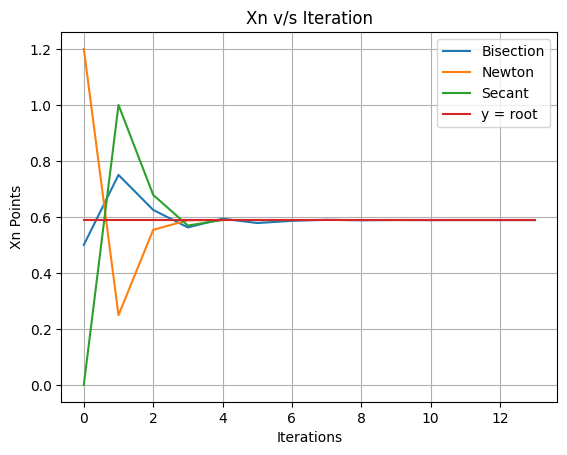


Second Root = 0.58853274


In [76]:
root1_b = p.find_roots(a=0, b=1, method='bisection')
root1_nr = p.find_roots(a=1.2, b=0.5, method='newton')
root1_s = p.find_roots(a=0, b=1, method='secant')
p.converence_plot(root=root1_s, xlimit=(-5, 5), ylimit=(-5, 5))
print(f"\nSecond Root = {root1_s}")

(f) The real root of $x^{3}-2x-2=0$.

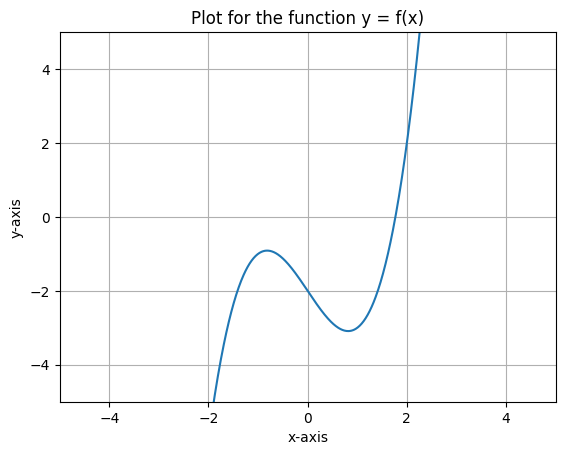


Initial guess of X0 and X1 on the left of the root:
Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0      0  1.000000 -3.000000e+00       NaN
1      1  1.500000 -1.625000e+00  0.500000
2      2  2.090909  2.959429e+00  0.590909
3      3  1.709454 -4.234847e-01 -0.381455
4      4  1.757206 -8.855955e-02  0.047752
5      5  1.769832  3.992072e-03  0.012626
6      6  1.769288 -3.484945e-05 -0.000545
7      7  1.769292 -1.350818e-08  0.000005


Convergence plot of the root:


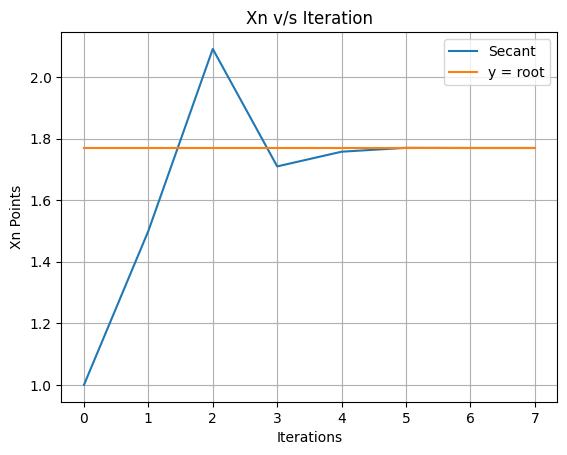


Root = 1.76929235


Initial guess of X0 and X1 on the different side of the root:
Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0      0  1.500000 -1.625000e+00       NaN
1      1  2.000000  2.000000e+00  0.500000
2      2  1.724138 -3.230145e-01 -0.275862
3      3  1.762496 -4.998482e-02  0.038359
4      4  1.769519  1.675069e-03  0.007022
5      5  1.769291 -8.202147e-06 -0.000228
6      6  1.769292 -1.334536e-09  0.000001


Convergence plot of the root:


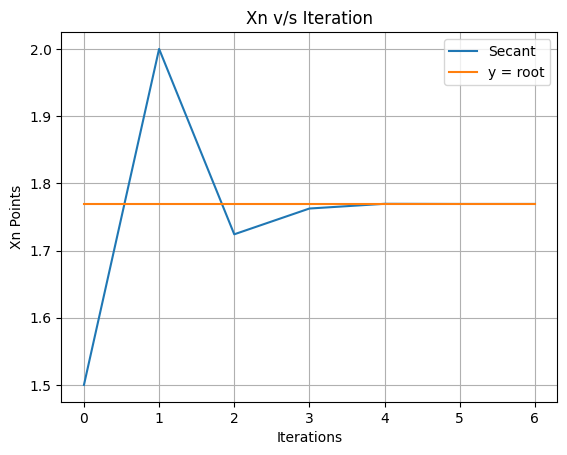


Root = 1.76929235

Initial guess of X0 and X1 on the right of the root:
Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0      0  2.000000  2.000000e+00       NaN
1      1  2.500000  8.625000e+00  0.500000
2      2  1.849057  6.238304e-01 -0.650943
3      3  1.798304  2.189242e-01 -0.050752
4      4  1.770864  1.162576e-02 -0.027441
5      5  1.769325  2.380855e-04 -0.001539
6      6  1.769292  2.683972e-07 -0.000032


Convergence plot of the root:


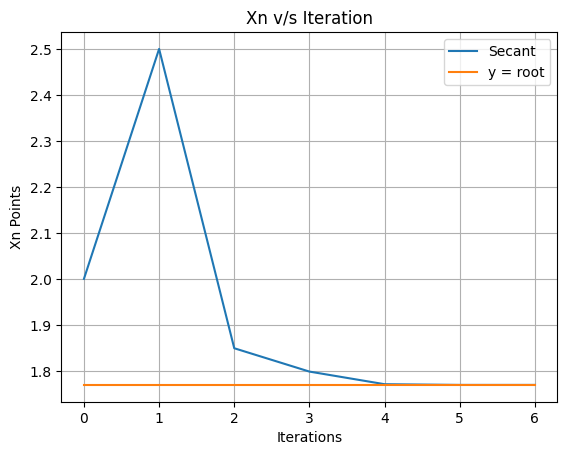


Root = 1.76929239


In [77]:
p = polynomial(function = lambda x: x**3 - 2*x - 2, accuracy=0.0001)
p.plot(high=20, xlimit=(-5, 5), ylimit=(-5, 5))
print("\nInitial guess of X0 and X1 on the left of the root:")
root = p.find_roots(a=1, b=1.5, method='secant')
p.converence_plot(root=root, xlimit=(-5, 5), ylimit=(-5, 5), do_plot = [False, False, True])
print(f"\nRoot = {root}\n")

print("\nInitial guess of X0 and X1 on the different side of the root:")
root = p.find_roots(a=1.5, b=2, method='secant')
p.converence_plot(root=root, xlimit=(-5, 5), ylimit=(-5, 5), do_plot = [False, False, True])
print(f"\nRoot = {root}")

print("\nInitial guess of X0 and X1 on the right of the root:")
root = p.find_roots(a=2, b=2.5, method='secant')
p.converence_plot(root=root, xlimit=(-5, 5), ylimit=(-5, 5), do_plot = [False, False, True])
print(f"\nRoot = {root}")

<h4> Comparison Plots:

Calculation Table for Bisection Method:



Index        An        Bn         C      Bn-C      F(C)
0       1  0.000000  2.000000  1.000000  1.000000 -3.000000
1       2  1.000000  2.000000  1.500000  0.500000 -1.625000
2       3  1.500000  2.000000  1.750000  0.250000 -0.140625
3       4  1.750000  2.000000  1.875000  0.125000  0.841797
4       5  1.750000  1.875000  1.812500  0.062500  0.329346
5       6  1.750000  1.812500  1.781250  0.031250  0.089142
6       7  1.750000  1.781250  1.765625  0.015625 -0.027035
7       8  1.765625  1.781250  1.773438  0.007812  0.030729
8       9  1.765625  1.773438  1.769531  0.003906  0.001766
9      10  1.765625  1.769531  1.767578  0.001953 -0.012655
10     11  1.767578  1.769531  1.768555  0.000977 -0.005449
11     12  1.768555  1.769531  1.769043  0.000488 -0.001843
12     13  1.769043  1.769531  1.769287  0.000244 -0.000039
13     14  1.769287  1.769531  1.769409  0.000122  0.000864
14     15  1.769287  1.769409  1.769348  0.000061  0.000412

Calculation Table for Newton-Rapshon Method:



Index        Xn      F(Xn)  Xn - Xn-1      Xn+1
0      0  1.000000  -3.000000        NaN  3.999100
1      1  3.999100  53.958621   2.999100  2.825567
2      2  2.825567  14.907699  -1.173534  2.146472
3      3  2.146472   3.596590  -0.679094  1.842261
4      4  1.842261   0.567975  -0.304211  1.772846
5      5  1.772846   0.026334  -0.069415  1.769302
6      6  1.769302   0.000069  -0.003545  1.769292

Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0      0  1.500000 -1.625000e+00       NaN
1      1  2.000000  2.000000e+00  0.500000
2      2  1.724138 -3.230145e-01 -0.275862
3      3  1.762496 -4.998482e-02  0.038359
4      4  1.769519  1.675069e-03  0.007022
5      5  1.769291 -8.202147e-06 -0.000228
6      6  1.769292 -1.334536e-09  0.000001


Convergence plot of the root:


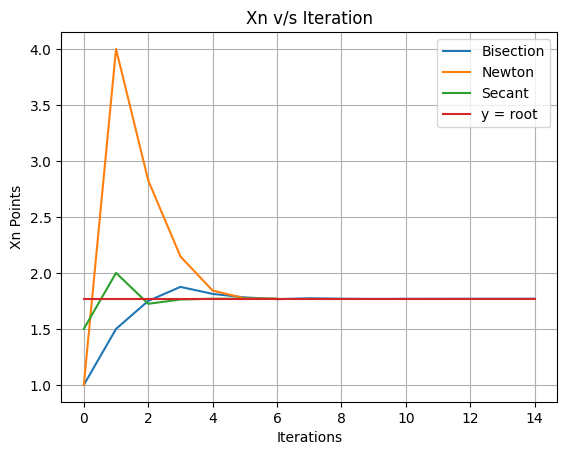


Second Root = 1.76929235


In [78]:
root1_b = p.find_roots(a=0, b=2, method='bisection')
root1_nr = p.find_roots(a=1, b=2, method='newton')
root1_s = p.find_roots(a=1.5, b=2, method='secant')
p.converence_plot(root=root1_s, xlimit=(-5, 5), ylimit=(-5, 5))
print(f"\nSecond Root = {root1_s}")

(g) All real roots of $x^{4}-x-1=0$.

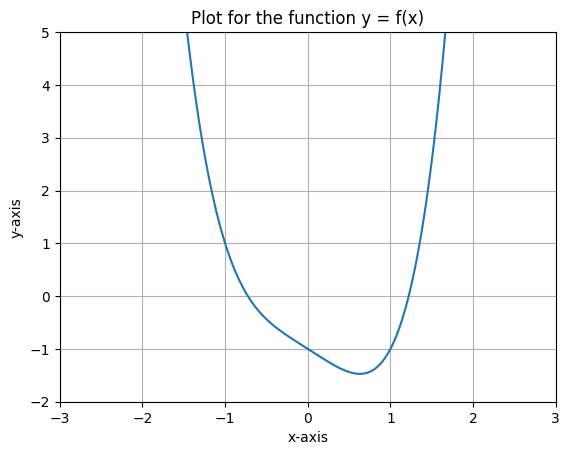


Initial guess of X0 and X1 on the left of both roots:
Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0      0 -1.500000  5.562500e+00       NaN
1      1 -1.000000  1.000000e+00  0.500000
2      2 -0.890411  5.189930e-01  0.109589
3      3 -0.772167  1.276727e-01  0.118243
4      4 -0.733589  2.319793e-02  0.038578
5      5 -0.725023  1.340031e-03  0.008566
6      6 -0.724498  1.516954e-05  0.000525
7      7 -0.724492  1.006361e-08  0.000006


Convergence plot of the root:


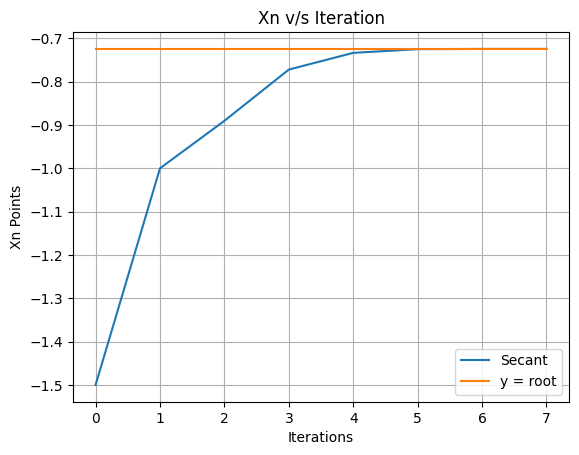


Root = -0.72449196


Initial guess of X0 and X1 on the different side of the negative root:
Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0      0 -1.000000  1.000000e+00       NaN
1      1  0.000000 -1.000000e+00  1.000000
2      2 -0.500000 -4.375000e-01 -0.500000
3      3 -0.888889  5.131840e-01 -0.388889
4      4 -0.678965 -1.085207e-01  0.209924
5      5 -0.715608 -2.215166e-02 -0.036643
6      6 -0.725006  1.296217e-03 -0.009398
7      7 -0.724486 -1.441530e-05  0.000520
8      8 -0.724492 -9.250981e-09 -0.000006


Convergence plot of the root:


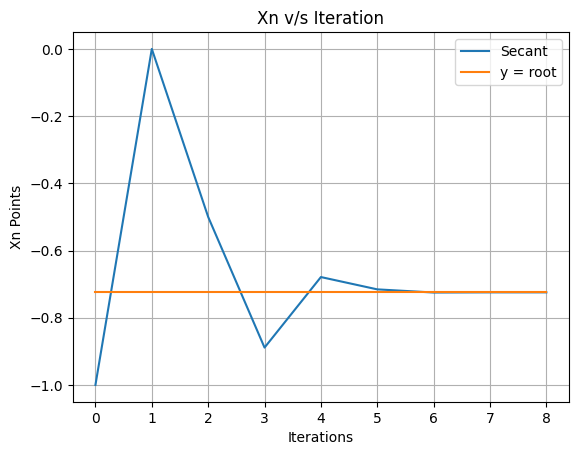


Root = -0.72449196

Initial guess of X0 and X1 in between both roots:
Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0      0 -0.500000 -4.375000e-01       NaN
1      1  0.500000 -1.437500e+00  1.000000
2      2 -0.937500  7.099762e-01 -1.437500
3      3 -0.462249 -4.920947e-01  0.475251
4      4 -0.656804 -1.570984e-01 -0.194555
5      5 -0.748041  6.115457e-02 -0.091238
6      6 -0.722476 -5.068987e-03  0.025565
7      7 -0.724433 -1.483869e-04 -0.001957
8      8 -0.724492  3.739141e-07 -0.000059


Convergence plot of the root:


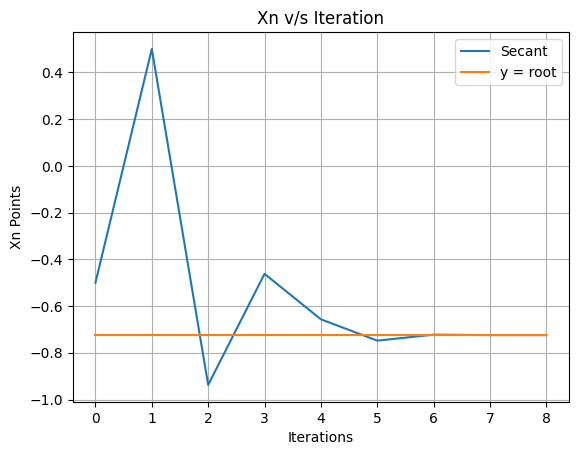


Root = -0.72449211

Initial guess of X0 and X1 on the different side of the positive root:
Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0      0  0.500000 -1.437500e+00       NaN
1      1  1.500000  2.562500e+00  1.000000
2      2  0.859375 -1.313955e+00 -0.640625
3      3  1.076520 -7.334820e-01  0.217145
4      4  1.350903  9.794966e-01  0.274383
5      5  1.194008 -1.615146e-01 -0.156895
6      6  1.216217 -2.823108e-02  0.022209
7      7  1.220921  1.112890e-03  0.004704
8      8  1.220743 -7.202314e-06 -0.000178
9      9  1.220744 -1.818392e-09  0.000001


Convergence plot of the root:


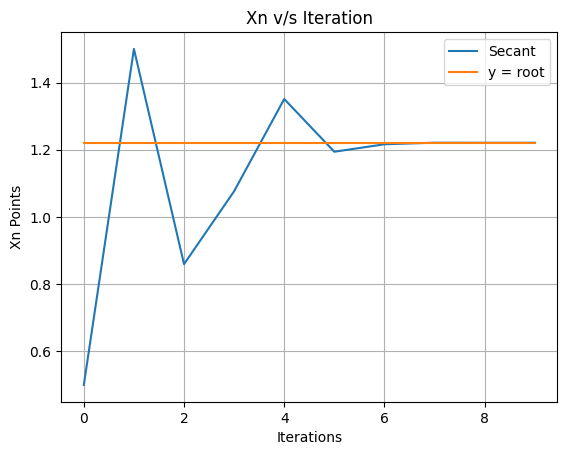


Root = 1.22074408

Initial guess of X0 and X1 on the right of both roots:
Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0      0  1.500000  2.562500e+00       NaN
1      1  2.000000  1.300000e+01  0.500000
2      2  1.377246  1.220624e+00 -0.622754
3      3  1.312713  6.567607e-01 -0.064532
4      4  1.237549  1.080298e-01 -0.075164
5      5  1.222752  1.263697e-02 -0.014798
6      6  1.220791  2.967623e-04 -0.001960
7      7  1.220744  8.471037e-07 -0.000047


Convergence plot of the root:


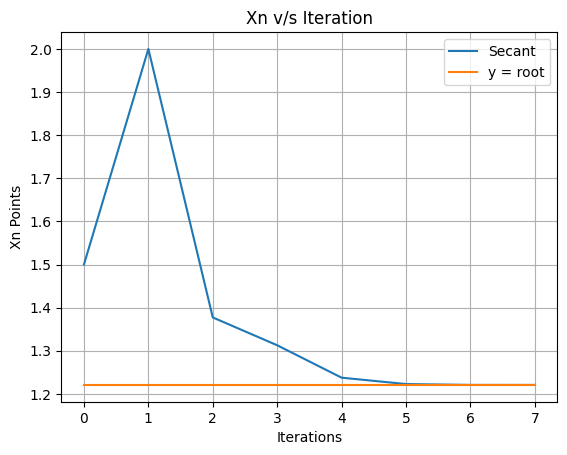


Root = 1.22074422



In [79]:
p = polynomial(function = lambda x: x**4 - x - 1, accuracy=0.0001)
p.plot(high=20, xlimit=(-3, 3), ylimit=(-2, 5))
print("\nInitial guess of X0 and X1 on the left of both roots:")
root = p.find_roots(a=-1.5, b=-1, method='secant')
p.converence_plot(root=root, xlimit=(-3, 3), ylimit=(-2, 5), do_plot = [False, False, True])
print(f"\nRoot = {root}\n")

print("\nInitial guess of X0 and X1 on the different side of the negative root:")
root = p.find_roots(a=-1, b=0, method='secant')
p.converence_plot(root=root, xlimit=(-3, 3), ylimit=(-2, 5), do_plot = [False, False, True])
print(f"\nRoot = {root}")

print("\nInitial guess of X0 and X1 in between both roots:")
root = p.find_roots(a=-0.5, b=0.5, method='secant')
p.converence_plot(root=root, xlimit=(-3, 3), ylimit=(-2, 5), do_plot = [False, False, True])
print(f"\nRoot = {root}")

print("\nInitial guess of X0 and X1 on the different side of the positive root:")
root = p.find_roots(a=0.5, b=1.5, method='secant')
p.converence_plot(root=root, xlimit=(-3, 3), ylimit=(-2, 5), do_plot = [False, False, True])
print(f"\nRoot = {root}")

print("\nInitial guess of X0 and X1 on the right of both roots:")
root = p.find_roots(a=1.5, b=2, method='secant')
p.converence_plot(root=root, xlimit=(-3, 3), ylimit=(-2, 5), do_plot = [False, False, True])
print(f"\nRoot = {root}\n")

<h4> Comparison Plots:

Calculation Table for Bisection Method:



Index        An        Bn         C      Bn-C      F(C)
0       1 -2.000000  0.000000 -1.000000  1.000000  1.000000
1       2 -1.000000  0.000000 -0.500000  0.500000 -0.437500
2       3 -1.000000 -0.500000 -0.750000  0.250000  0.066406
3       4 -0.750000 -0.500000 -0.625000  0.125000 -0.222412
4       5 -0.750000 -0.625000 -0.687500  0.062500 -0.089096
5       6 -0.750000 -0.687500 -0.718750  0.031250 -0.014373
6       7 -0.750000 -0.718750 -0.734375  0.015625  0.025227
7       8 -0.734375 -0.718750 -0.726562  0.007812  0.005234
8       9 -0.726562 -0.718750 -0.722656  0.003906 -0.004617
9      10 -0.726562 -0.722656 -0.724609  0.001953  0.000296
10     11 -0.724609 -0.722656 -0.723633  0.000977 -0.002164
11     12 -0.724609 -0.723633 -0.724121  0.000488 -0.000935
12     13 -0.724609 -0.724121 -0.724365  0.000244 -0.000319
13     14 -0.724609 -0.724365 -0.724487  0.000122 -0.000012
14     15 -0.724609 -0.724487 -0.724548  0.000061  0.000142

Calculation Table for Newton-Rapshon Method:



Index        Xn         F(Xn)  Xn - Xn-1      Xn+1
0      0 -2.000000  1.700000e+01        NaN -1.484811
1      1 -1.484811  5.345353e+00   0.515189 -1.105512
2      2 -1.105512  1.599179e+00   0.379299 -0.855785
3      3 -0.855785  3.921468e-01   0.249727 -0.743952
4      4 -0.743952  5.027567e-02   0.111832 -0.724956
5      5 -0.724956  1.171699e-03   0.018996 -0.724492
6      6 -0.724492  5.330315e-07   0.000464 -0.724492

Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0      0 -1.000000  1.000000e+00       NaN
1      1  0.000000 -1.000000e+00  1.000000
2      2 -0.500000 -4.375000e-01 -0.500000
3      3 -0.888889  5.131840e-01 -0.388889
4      4 -0.678965 -1.085207e-01  0.209924
5      5 -0.715608 -2.215166e-02 -0.036643
6      6 -0.725006  1.296217e-03 -0.009398
7      7 -0.724486 -1.441530e-05  0.000520
8      8 -0.724492 -9.250981e-09 -0.000006


Convergence plot of the root:


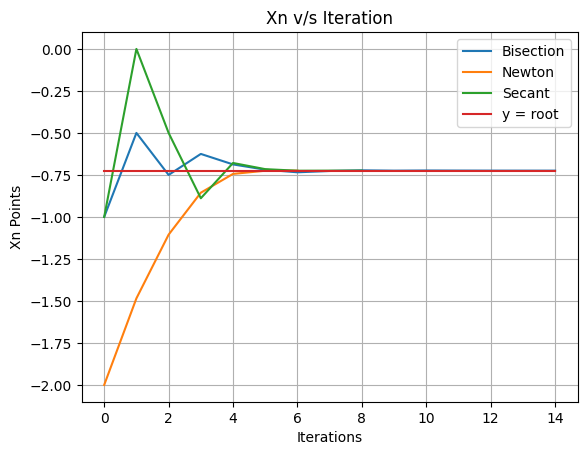


Second Root = -0.72449196


In [80]:
root1_b = p.find_roots(a=-2, b=0, method='bisection')
root1_nr = p.find_roots(a=-2, b=2, method='newton')
root1_s = p.find_roots(a=-1, b=0, method='secant')
p.converence_plot(root=root1_s, xlimit=(-5, 5), ylimit=(-5, 5))
print(f"\nSecond Root = {root1_s}")

Calculation Table for Bisection Method:



Index        An        Bn         C      Bn-C      F(C)
0       1  0.000000  2.000000  1.000000  1.000000 -1.000000
1       2  1.000000  2.000000  1.500000  0.500000  2.562500
2       3  1.000000  1.500000  1.250000  0.250000  0.191406
3       4  1.000000  1.250000  1.125000  0.125000 -0.523193
4       5  1.125000  1.250000  1.187500  0.062500 -0.198959
5       6  1.187500  1.250000  1.218750  0.031250 -0.012481
6       7  1.218750  1.250000  1.234375  0.015625  0.087231
7       8  1.218750  1.234375  1.226562  0.007812  0.036824
8       9  1.218750  1.226562  1.222656  0.003906  0.012035
9      10  1.218750  1.222656  1.220703  0.001953 -0.000257
10     11  1.220703  1.222656  1.221680  0.000977  0.005880
11     12  1.220703  1.221680  1.221191  0.000488  0.002809
12     13  1.220703  1.221191  1.220947  0.000244  0.001276
13     14  1.220703  1.220947  1.220825  0.000122  0.000509
14     15  1.220703  1.220825  1.220764  0.000061  0.000126

Calculation Table for Newton-Rapshon Method:



Index        Xn      F(Xn)  Xn - Xn-1      Xn+1
0      0  2.000000  13.000000        NaN  1.580678
1      1  1.580678   3.662033  -0.419322  1.333227
2      2  1.333227   0.826260  -0.247450  1.235794
3      3  1.235794   0.096506  -0.097433  1.221060
4      4  1.221060   0.001987  -0.014734  1.220744
5      5  1.220744   0.000001  -0.000316  1.220744

Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0      0  0.500000 -1.437500e+00       NaN
1      1  1.500000  2.562500e+00  1.000000
2      2  0.859375 -1.313955e+00 -0.640625
3      3  1.076520 -7.334820e-01  0.217145
4      4  1.350903  9.794966e-01  0.274383
5      5  1.194008 -1.615146e-01 -0.156895
6      6  1.216217 -2.823108e-02  0.022209
7      7  1.220921  1.112890e-03  0.004704
8      8  1.220743 -7.202314e-06 -0.000178
9      9  1.220744 -1.818392e-09  0.000001


Convergence plot of the root:


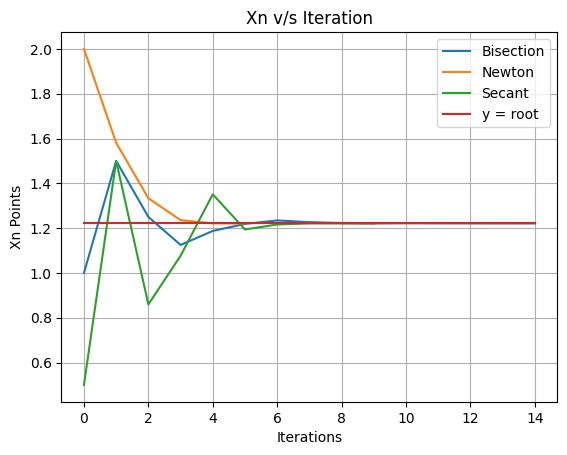


Second Root = 1.22074408


In [81]:
root2_b = p.find_roots(a=0, b=2, method='bisection')
root2_nr = p.find_roots(a=2, b=2, method='newton')
root2_s = p.find_roots(a=0.5, b=1.5, method='secant')
p.converence_plot(root=root2_s, xlimit=(-5, 5), ylimit=(-5, 5))
print(f"\nSecond Root = {root2_s}")

2 To help determine the roots of $x = tan(x)$, graph $y = x$ and $y = tan(x)$, and look at the intersection points of the two curves. Numerically test the convergence of the problem given in Question 2 in the theory exercises on the Newton-Raphson method.


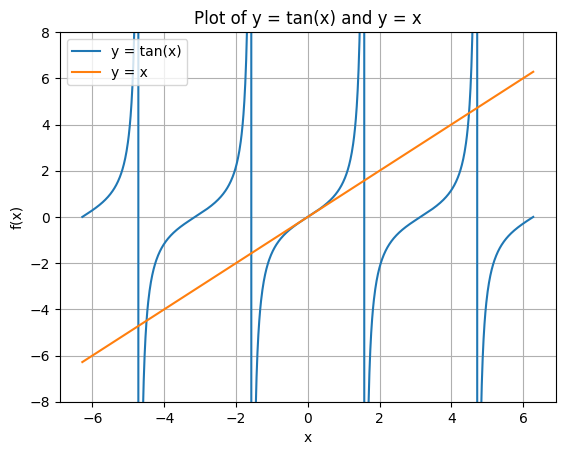

In [82]:
low, high = -2 * np.pi, 2 * np.pi
x = np.linspace(low, high, 1000)
f = np.tan(x)

plt.plot(x, f, label='y = tan(x)')
plt.plot(x, x, label='y = x')
plt.ylim(-8, 8)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of y = tan(x) and y = x')
plt.grid(True)
plt.legend()
plt.show()

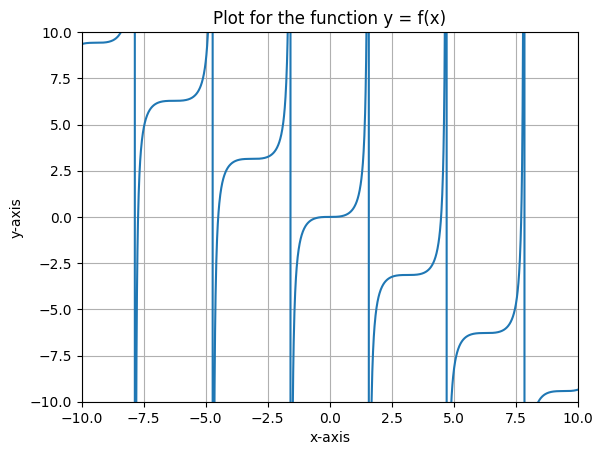

Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0       0  4.000000 -2.842179e+00       NaN
1       1  4.600000  4.260175e+00  0.600000
2       2  4.240105 -2.282557e+00 -0.359895
3       3  4.365661 -1.598069e+00  0.125556
4       4  4.658797  1.398282e+01  0.293136
5       5  4.395727 -1.344055e+00 -0.263070
6       6  4.418796 -1.111151e+00  0.023069
7       7  4.528857  8.584572e-01  0.110061
8       8  4.480886 -2.387231e-01 -0.047970
9       9  4.491324 -4.170139e-02  0.010437
10     10  4.493533  2.493918e-03  0.002209
11     11  4.493408 -2.452301e-05 -0.000125
12     12  4.493409 -1.427629e-08  0.000001


Convergence plot of the root:


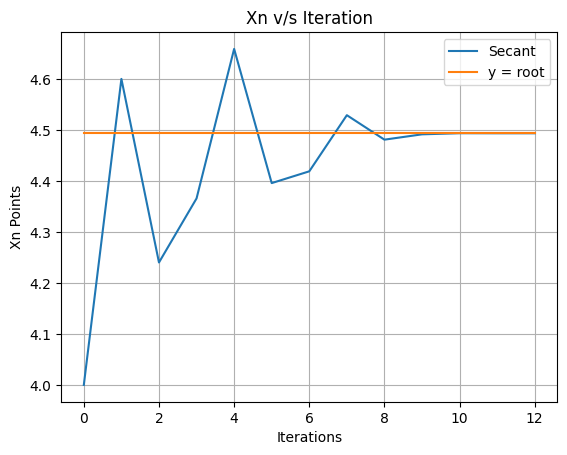


Root greater than pi/2 = 4.49340946



In [83]:
p = polynomial(function = lambda x: np.tan(x) - x, accuracy=0.0001)
p.plot(high=20, xlimit=(-10, 10), ylimit=(-10, 10))
root = p.find_roots(a=4, b=4.6, method='secant')
p.converence_plot(root=root, xlimit=(-10, 10), ylimit=(-10, 10), do_plot = [False, False, True])
print(f"\nRoot greater than pi/2 = {root}\n")

<h4> Comparison Plots:

Calculation Table for Bisection Method:



Index        An        Bn         C      Bn-C      F(C)
0       1  4.000000  4.600000  4.300000  0.300000 -2.014152
1       2  4.300000  4.600000  4.450000  0.150000 -0.726731
2       3  4.450000  4.600000  4.525000  0.075000  0.748883
3       4  4.450000  4.525000  4.487500  0.037500 -0.116078
4       5  4.487500  4.525000  4.506250  0.018750  0.275938
5       6  4.487500  4.506250  4.496875  0.009375  0.071134
6       7  4.487500  4.496875  4.492187  0.004688 -0.024531
7       8  4.492187  4.496875  4.494531  0.002344  0.022770
8       9  4.492187  4.494531  4.493359  0.001172 -0.001011
9      10  4.493359  4.494531  4.493945  0.000586  0.010847
10     11  4.493359  4.493945  4.493652  0.000293  0.004910
11     12  4.493359  4.493652  4.493506  0.000146  0.001947
12     13  4.493359  4.493506  4.493433  0.000073  0.000468

Calculation Table for Newton-Rapshon Method:



Index        Xn     F(Xn)  Xn - Xn-1      Xn+1
0      0  4.600000  4.260175        NaN  4.545781
1      1  4.545781  1.400687  -0.054219  4.506193
2      2  4.506193  0.274643  -0.039587  4.494183
3      3  4.494183  0.015683  -0.012010  4.493413
4      4  4.493413  0.000064  -0.000771  4.493409

Calculation Table for Secant Method:



Index        Xn         F(Xn)   Xn-Xn-1
0       0  4.000000 -2.842179e+00       NaN
1       1  4.600000  4.260175e+00  0.600000
2       2  4.240105 -2.282557e+00 -0.359895
3       3  4.365661 -1.598069e+00  0.125556
4       4  4.658797  1.398282e+01  0.293136
5       5  4.395727 -1.344055e+00 -0.263070
6       6  4.418796 -1.111151e+00  0.023069
7       7  4.528857  8.584572e-01  0.110061
8       8  4.480886 -2.387231e-01 -0.047970
9       9  4.491324 -4.170139e-02  0.010437
10     10  4.493533  2.493918e-03  0.002209
11     11  4.493408 -2.452301e-05 -0.000125
12     12  4.493409 -1.427629e-08  0.000001


Convergence plot of the root:


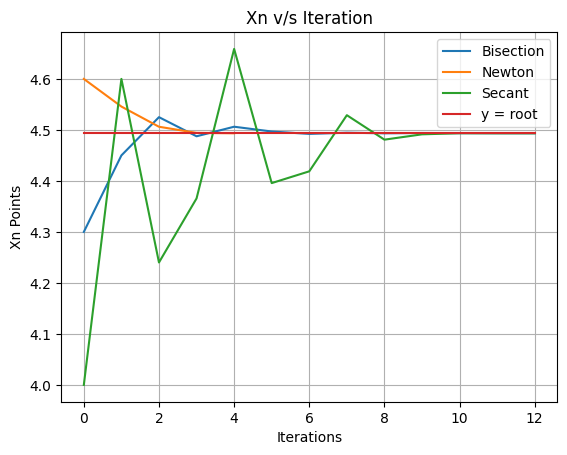


Second Root = 4.49340946


In [84]:
root2_b = p.find_roots(a=4, b=4.6, method='bisection')
root2_nr = p.find_roots(a=4.6, b=2, method='newton')
root2_s = p.find_roots(a=4, b=4.6, method='secant')
p.converence_plot(root=root2_s, xlimit=(-5, 5), ylimit=(-5, 5))
print(f"\nSecond Root = {root2_s}")

Calculation Table for Secant Method:



Index         Xn       F(Xn)   Xn-Xn-1
0      0  98.950000   -0.611320       NaN
1      1  99.000000 -124.092535  0.050000
2      2  98.949752   -2.948219 -0.050248
3      3  98.948530  -13.034144 -0.001223
4      4  98.950110    0.463225  0.001580
5      5  98.950056   -0.069907 -0.000054


Convergence plot of the root:


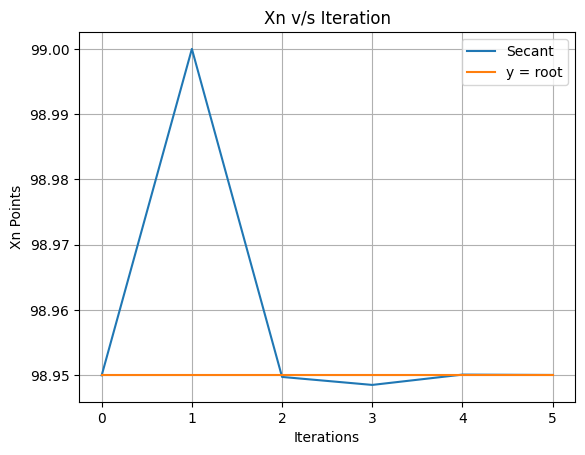


Root closest to 100 = 98.95005568


In [85]:
root = p.find_roots(a=98.95, b=99, method='secant')
p.converence_plot(root=root, xlimit=(98.5, 99.5), ylimit=(-4000, 8000), do_plot = [False, False, True])
print(f"\nRoot closest to 100 = {root}")

Calculation Table for Bisection Method:



Index         An          Bn          C      Bn-C          F(C)
0       1  98.959000  100.000000  99.479500  0.520500   -101.228747
1       2  98.959000   99.479500  99.219250  0.260250   -102.992291
2       3  98.959000   99.219250  99.089125  0.130125   -106.800650
3       4  98.959000   99.089125  99.024062  0.065062   -114.653702
4       5  98.959000   99.024062  98.991531  0.032531   -130.866125
5       6  98.959000   98.991531  98.975266  0.016266   -165.208397
6       7  98.959000   98.975266  98.967133  0.008133   -242.555819
7       8  98.959000   98.967133  98.963066  0.004066   -444.049315
8       9  98.959000   98.963066  98.961033  0.002033  -1255.544827
9      10  98.959000   98.961033  98.960017  0.001017   6480.570975
10     11  98.960017   98.961033  98.960525  0.000508  -2905.471673
11     12  98.960017   98.960525  98.960271  0.000254  -9887.155953
12     13  98.960017   98.960271  98.960144  0.000127  40043.431853
13     14  98.960144   98.960271  98.960207  0.000064 -25988.071915

Calculation Table for Newton-Rapshon Method:



Index         Xn       F(Xn)  Xn - Xn-1       Xn+1
0      0  98.959000  756.774139        NaN  98.958055
1      1  98.958055  374.167108  -0.000945  98.956463
2      2  98.956463  170.871700  -0.001592  98.954179
3      3  98.954179   67.999217  -0.002284  98.951780
4      4  98.951780   20.256766  -0.002399  98.950372
5      5  98.950372    3.119148  -0.001408  98.950075
6      6  98.950075    0.122489  -0.000296  98.950063

Calculation Table for Secant Method:



Index         Xn       F(Xn)   Xn-Xn-1
0      0  98.950000   -0.611320       NaN
1      1  99.000000 -124.092535  0.050000
2      2  98.949752   -2.948219 -0.050248
3      3  98.948530  -13.034144 -0.001223
4      4  98.950110    0.463225  0.001580
5      5  98.950056   -0.069907 -0.000054


Convergence plot of the root:


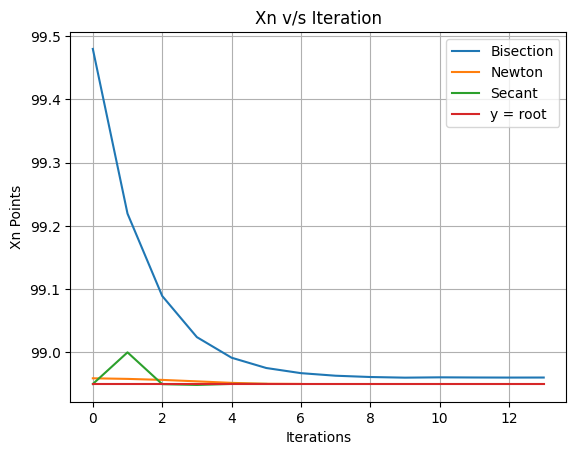


Second Root = 98.95005568


In [86]:
root2_b = p.find_roots(a=98.959, b=100, method='bisection')
root2_nr = p.find_roots(a=98.959, b=2, method='newton')
root2_s = p.find_roots(a=98.95, b=99, method='secant')
p.converence_plot(root=root2_s, xlimit=(-5, 5), ylimit=(-5, 5))
print(f"\nSecond Root = {root2_s}")

<h2>Matrix Decomposition</h2>


<p> 1. Write a function 'myUL', that takes a matrix A, and returns the permutation matrix P, upper triangular matrix U and lower triangular matrix L, such that PA = UL (this is not a typo!)

<p> 2. Print examples of matrices A with matrices P,L and U such that PA = UL,
with a verification for PA=UL

In [87]:
def myUL(matrix):

    n = len(matrix)
    lowmat = copy.deepcopy(matrix)
    permute = np.eye(n)
    identity = np.eye(n)
    operation = identity

    for i in range(n-1, -1, -1):

        if lowmat[i][i] == 0:
            # print('Enter')
            j = i - 1
            while j > -1 and lowmat[j][i] == 0:
                j -= 1
            if j == -1:
                continue
            else:
                permute[[i, j]] = permute[[j, i]]
                lowmat[[i,j]] = lowmat[[j,i]]

        op = copy.deepcopy(identity)
        for j in range(i - 1, -1, -1):
            m = lowmat[j][i] / lowmat[i][i]
            op[j][i] = -m
            lowmat[j][i] = 0
            for k in range(i - 1, -1, -1):
                x1 = m * lowmat[i][k]
                x2 = lowmat[j][k]
                lowmat[j][k] = x2 - x1

        # print(i, op)
        operation = np.dot(op,operation)

    upper = get_inv(operation)
    return upper, lowmat, permute

def get_inv(matrix):
    matinv = np.linalg.inv(matrix)
    return matinv

def printList(lst):
    for a in lst:
        print(list(np.round(a, 4)))
    print("\n")

mat = np.array( [[6, 2, 2], [2, 2/3, 1/3], [1, 2, -1]], dtype = float)
upper, lower, permute = myUL(mat)

print('A Matrix :')
printList(list(mat))
print('Upper Triangular :')
printList(list(upper))
print('Lower Triangular :')
printList(list(lower))
print('Permutation Matrix :')
printList(list(permute))
print('PA = UL')
printList(list(np.dot(upper, lower)))

A Matrix :
[6.0, 2.0, 2.0]
[2.0, 0.6667, 0.3333]
[1.0, 2.0, -1.0]


Upper Triangular :
[1.0, 4.5, -2.0]
[0.0, 1.0, -0.3333]
[0.0, 0.0, 1.0]


Lower Triangular :
[-2.5, 0.0, 0.0]
[2.3333, 1.3333, 0.0]
[1.0, 2.0, -1.0]


Permutation Matrix :
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.0, 0.0, 1.0]


PA = UL
[6.0, 2.0, 2.0]
[2.0, 0.6667, 0.3333]
[1.0, 2.0, -1.0]




<h2>Gauss Elimination Method</h2>


<h4>Function to solve system of linear equations. </h4>

In [88]:
def solve_linear_equations(A, B):

    p = []

    def solve(A, v, n, b):

        k = float("inf")
        j = -1
        for i in range(len(v)):
            if(v[i] != 0):
                k = v[i]
                j = i
                break

        p.append(j)
        if(k != float("inf")):
            v = np.divide(v,k)
            b = np.divide(b,k)

        for i in range (n+1,len(A)):
            r = v * A[i][j]
            s = b * A[i][j]
            A[i] -= r
            B[i] -= s

        return v, b

    A_prime = []
    B_prime = []
    for i in range(len(A)):
        v = A[i]
        b = B[i]
        v,b = solve(A,v,i,b)
        A_prime.append(list(v))
        B_prime.append(list(b))

    A_final = A_prime.copy()
    B_final = B_prime.copy()

    for i in range(len(p)):
        A_final[p[i]] = A_prime[i]
        B_final[p[i]] = B_prime[i]

    ans = [0 for i in range(len(A[0]))]
    ans[len(A[0])-1] = 1
    for i in range (len(A)-1,-1,-1):
        j = 0
        while(j < len(A[0]) and ans[j] == 0):
            j += 1
        l = j
        j += 1
        k = 0
        while(j < len(A[0])):
            k += ans[j] * A_final[i][j]
            j += 1
        K = B_final[i][0]
        ans[l] = K - k
        if (l-1 >= 0):
            ans[l-1] = 1
    return list(np.round(ans,2))

<p> 1. Numerically solve the following system:
$$ x_1 + 2x_2 + x_3 = 0$$
$$ 2x_1 + 2x_2 + 3x_3 = 3$$
$$ -x_1 - 3x_2 = 2$$

In [89]:
A = [[1, 2, 1], [2, 2, 3], [-1, -3, 0]]
b = [[0], [3], [2]]
x = solve_linear_equations(A, b)
print("Solution: ", list(x))

Solution:  [1.0, -1.0, 1.0]


<p> 2. Numerically solve the following system:

$$ 4x_1 + 3x_2 + 2x_3 + x_4 = 1 $$
$$ 3x_1 + 4x_2 + 3x_3 + 2x_4 = 1 $$
$$ 2x_1 + 3x_2 + 4x_3 + 3x_4 = -1 $$
$$ x_1 + 2x_2 + 3x_3 + 4x_4 = -1 $$

In [90]:
A = [[4, 3, 2, 1], [3, 4, 3, 2], [2, 3, 4, 3], [1, 2, 3, 4]]
b = [[1], [1], [-1], [-1]]
x = solve_linear_equations(A, b)
print("Solution: ", list(x))

Solution:  [0.0, 1.0, -1.0, -0.0]
